In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


new_corpus_path = '../data/new_corpus.csv' 
new_corpus_data = pd.read_csv(new_corpus_path)

def tokenize_and_clean(text):
    """
    Tokenizes and cleans the input text.
    
    This function converts the text to lowercase, removes non-alphabetic characters, 
    splits the text into words, and removes stopwords.
    
    Args:
        text (str): The input text to tokenize and clean.
        
    Returns:
        list: A list of cleaned, tokenized words.
    """

    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return words

new_corpus_data['tokens'] = new_corpus_data['context'].apply(tokenize_and_clean)


new_corpus_data['context_length'] = new_corpus_data['context'].apply(len)

all_tokens = [token for tokens in new_corpus_data['tokens'] for token in tokens]
token_counts = Counter(all_tokens)
most_common_tokens = token_counts.most_common(20)


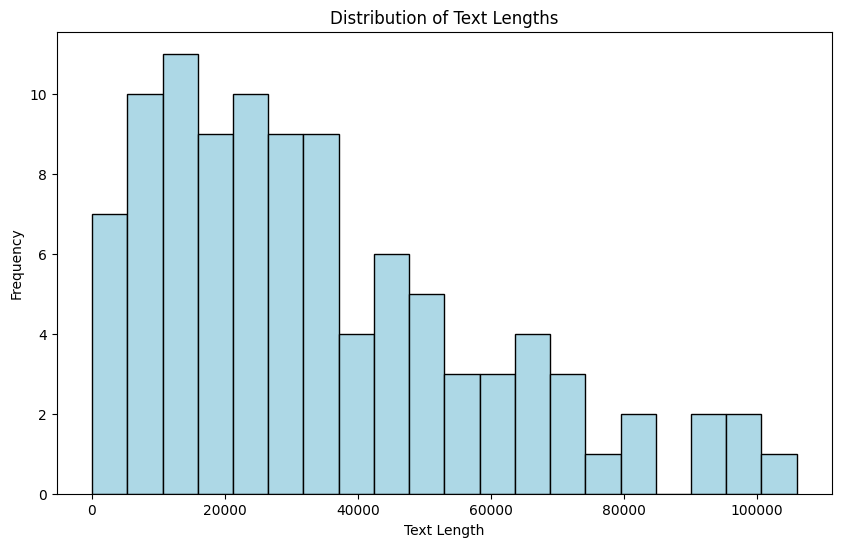

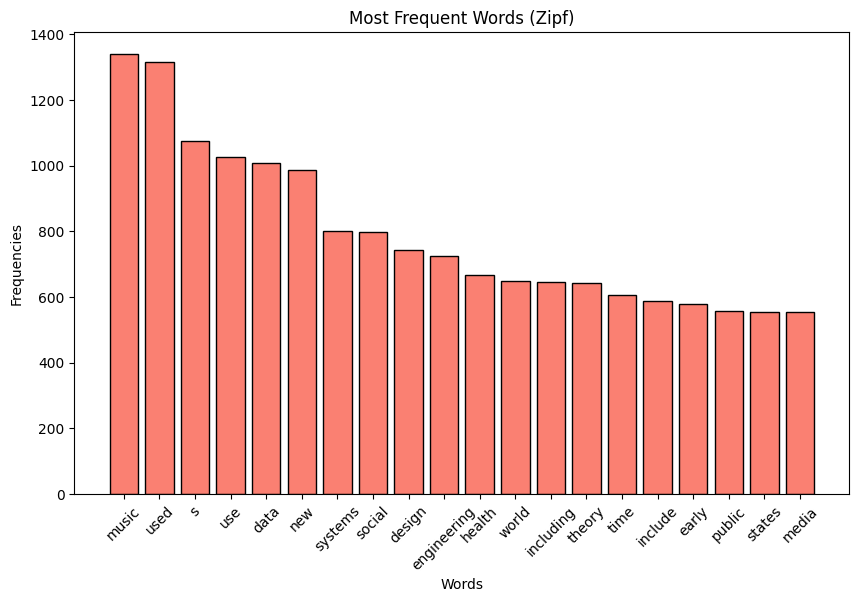

{'Total Tokens': 287927, 'Unique Tokens': 32909, 'Most Common Tokens': [('music', 1340), ('used', 1316), ('s', 1074), ('use', 1026), ('data', 1009), ('new', 986), ('systems', 801), ('social', 798), ('design', 744), ('engineering', 726), ('health', 667), ('world', 650), ('including', 645), ('theory', 643), ('time', 606), ('include', 589), ('early', 578), ('public', 559), ('states', 554), ('media', 554)]}


In [8]:

lengths = new_corpus_data['context_length']
words, frequencies = zip(*most_common_tokens)


# Histogram of text lengths
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Bar chart of the most frequent words
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='salmon', edgecolor='black')
plt.title('Most Frequent Words (Zipf)')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.xticks(rotation=45)
plt.show()


token_statistics = {
    "Total Tokens": len(all_tokens),
    "Unique Tokens": len(token_counts),
    "Most Common Tokens": most_common_tokens
}

print(token_statistics)


new_corpus_data.to_csv('new_corpus_with_statistics.csv', index=False)
